## Loading data

In [1]:
from sklearn import datasets, manifold, cluster, metrics
from sklearn.model_selection import train_test_split
%pylab inline

mnist = datasets.load_digits()

print(mnist.data.shape)
print(mnist.target.shape)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
(1797, 64)
(1797,)


## Splitting

In [2]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target)

In [3]:
X_train

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  0.,  4., ..., 15.,  5.,  0.],
       [ 0.,  0.,  6., ...,  4.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  1., 12., ..., 14.,  1.,  0.],
       [ 0.,  8., 13., ...,  0.,  0.,  0.]])

In [4]:
y_train

array([0, 6, 1, ..., 4, 3, 5])

# Clustering
## Giảm kích thước
Để giảm kích thước, chọn phương pháp tSNE có vẻ hoạt động tốt cho tập dữ liệu hơn.

In [5]:
tsne = manifold.TSNE(n_components=2, init='pca')
X_tsne = tsne.fit_transform(X_train)

C:\Users\Hoai\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Hoai\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


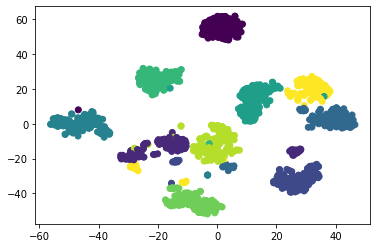

In [6]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_train); # Visualisation du résultat attendu

## Clustering

### Train set

In [7]:
cls = cluster.KMeans(n_clusters=10)
cls.fit(X_tsne)

KMeans(n_clusters=10)

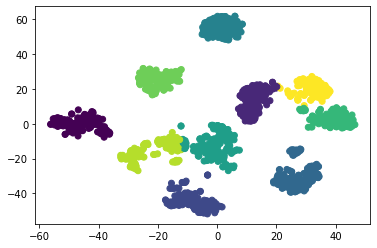

In [8]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=cls.labels_)

In [9]:
print("Độ chính xác trên tập train: ", metrics.adjusted_mutual_info_score(y_train, cls.labels_))

Độ chính xác trên tập train:  0.9004298649666076


### Test set

In [10]:
X_tsne_pred = tsne.fit_transform(X_test)
y_pred = cls.predict(X_tsne_pred)

C:\Users\Hoai\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Hoai\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


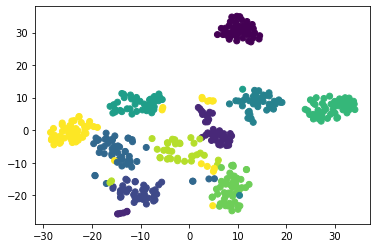

In [11]:
plt.scatter(X_tsne_pred[:,0], X_tsne_pred[:,1], c=y_test)

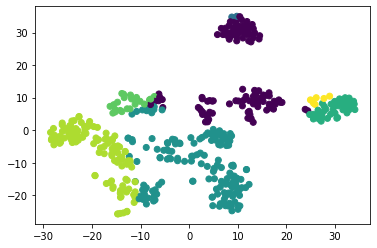

In [12]:
plt.scatter(X_tsne_pred[:,0], X_tsne_pred[:,1], c=y_pred)

In [13]:
print("Độ chính xác trên tập train: ", metrics.adjusted_mutual_info_score(y_test, y_pred));

Độ chính xác trên tập train:  0.5251438569637623


# End